In [14]:
import os, glob
import scanpy as sc

In [5]:
fn = glob.glob('../*/*/*/GSE201257_adata_assigned.h5ad')[0]
adata = sc.read_h5ad(fn)

In [6]:
adata

AnnData object with n_obs × n_vars = 8842 × 21676
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Hub_colors', 'assignments_colors', 'devtime_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'X_diff', 'X_pca', 'X_umap'
    layers: 'palantir_imp', 'scaled'
    obsp: 'connectivities', 'distances'

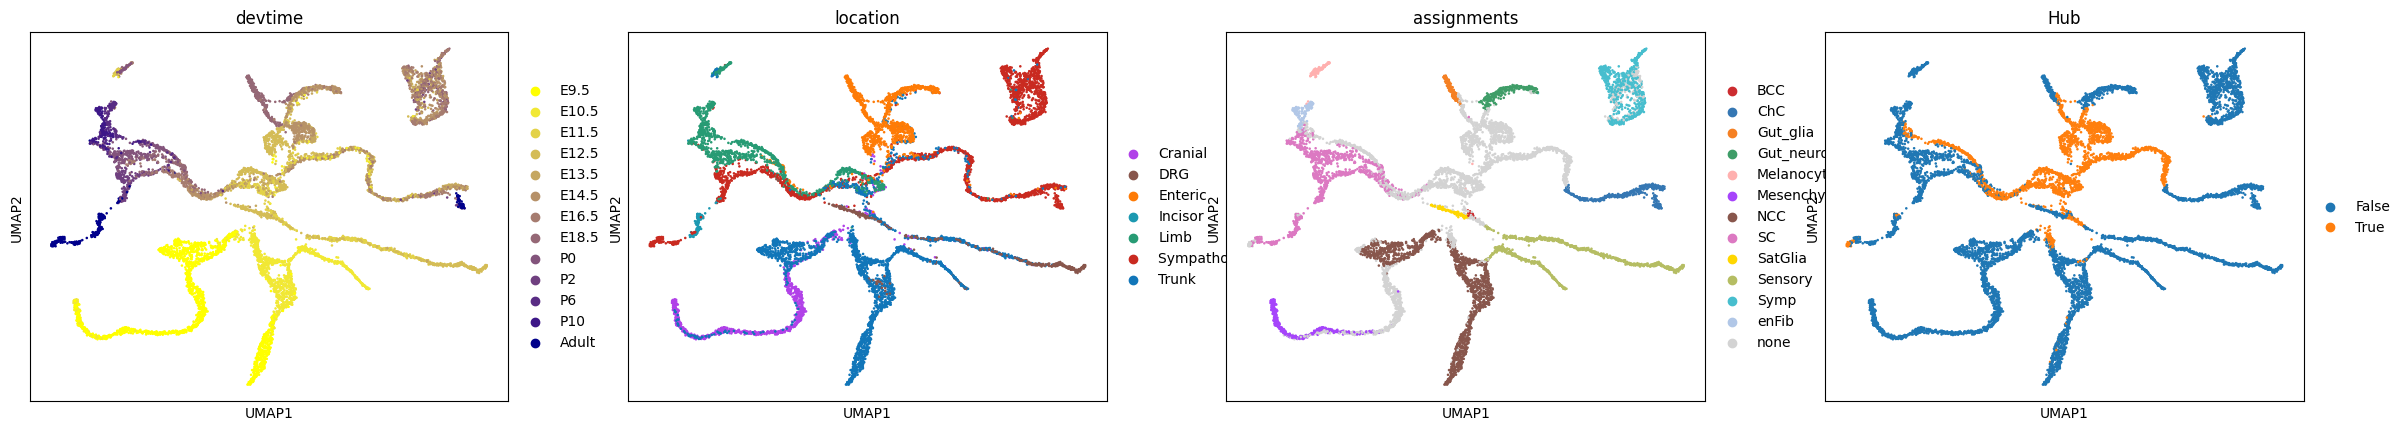

In [8]:
sc.pl.umap(adata, color = ['devtime', 'location', 'assignments', 'Hub'])

In [ ]:
celltype_dict = {
    'BCC' : 'Boundary Cap Cell',
    'ChC' : 'Chromaffin Cell',
    'Gut_glia' : 'Enteric Glia',
    'Gut_neuron' : 'Enteric Neuron',
    'Melanocyte' : 'Melanocyte',
    'Mesenchyme' : 'Cranial Mesenchyme',
    'NCC' : 'Neural Crest Cell',
    'SC' : 'Schwann Cell',
    'SatGlia' : 'Satelite Glia',
    'Sensory' : 'Sensory Neuron',
    'Symp' : 'Sympathetic Neuron',
    'enFib' : 'Endoneurial Fibroblast'
    }

adata.obs['celltype'] = adata.obs.assignments.map(celltype_dict).astype('category')
adata.obs.celltype = adata.obs.celltype.cat.add_categories(['Hub'])
adata.obs.loc[(adata.obs.Hub == 'True'), 'celltype'] = 'Hub'

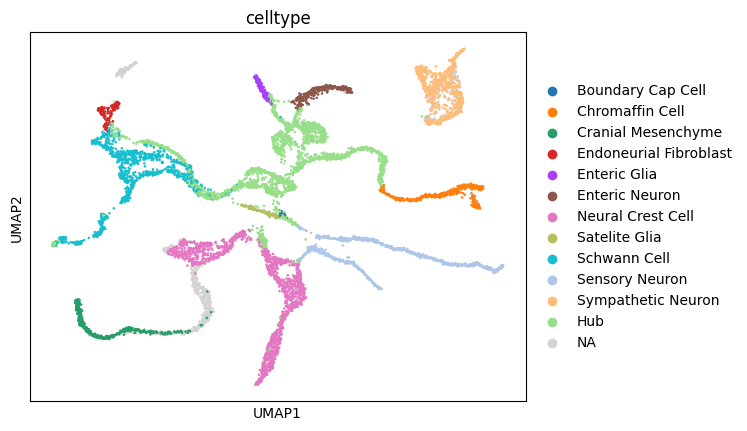

In [13]:
sc.pl.umap(adata, color = 'celltype')

In [15]:
os.mkdir('../data/processed/GSE201257/')
adata.write('../data/processed/GSE201257/GSE201257_adata_processed.h5ad')